# **Import necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima.model import ARIMA
import warnings

# **Load the data for analysis using pandas library**

In [ ]:
df = pd.read_csv('colombo_rh_2012-2018.csv') #read the dataset and pu it into a dataframe

In [ ]:
df.head(10) #read the first ten records

,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,RHMAX,2012,1,1,91
1,43466,COLOMBO,RHMAX,2012,1,2,90
2,43466,COLOMBO,RHMAX,2012,1,3,89
3,43466,COLOMBO,RHMAX,2012,1,4,89
4,43466,COLOMBO,RHMAX,2012,1,5,95
5,43466,COLOMBO,RHMAX,2012,1,6,93
6,43466,COLOMBO,RHMAX,2012,1,7,96
7,43466,COLOMBO,RHMAX,2012,1,8,96
8,43466,COLOMBO,RHMAX,2012,1,9,98
9,43466,COLOMBO,RHMAX,2012,1,10,93


# **Description of the Data**

In [ ]:
df.describe() #summary of the dataset

,station_id,year,month,day,obs_val
count,4383.0,4383.000000,4383.000000,4383.000000,4383.000000
mean,43466.0,2015.749258,6.522930,15.729637,82.619895
std,0.0,1.920691,3.449097,8.801096,8.533591
min,43466.0,2012.000000,1.000000,1.000000,46.000000
25%,43466.0,2014.500000,4.000000,8.000000,77.000000
50%,43466.0,2016.000000,7.000000,16.000000,84.000000
75%,43466.0,2017.000000,10.000000,23.000000,89.000000
max,43466.0,2018.000000,12.000000,31.000000,98.000000


# **PreProcessing the data**

### Creating a new column named "date" in the Pandas DataFrame "df" by concatenating the columns "year", "month", and "day" as strings and converting the resulting string into a Pandas datetime object using the pd.to_datetime() function. 

In [ ]:
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str))

### Dropping unnecessary columns 
### Station id and station name - Since all the data is for the city of Colombo and the station ID is same in all the data

In [ ]:
df = df.drop(['station_id', 'station_name', 'year', 'month', 'day'], axis=1)
df = df.set_index('date')

### Handling the null values

In [ ]:
df[df.isnull()]

,element_name,obs_val
date,,
2012-01-01,NaN,NaN
2012-01-02,NaN,NaN
2012-01-03,NaN,NaN
2012-01-04,NaN,NaN
2012-01-05,NaN,NaN
...,...,...
2018-12-27,NaN,NaN
2018-12-28,NaN,NaN
2018-12-29,NaN,NaN


In [ ]:
len(df[df.isnull()]) #count of null values

4383

In [ ]:
df = df.sort_index()

In [ ]:
df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2018-12-28', '2018-12-29', '2018-12-29', '2018-12-29',
               '2018-12-30', '2018-12-30', '2018-12-30', '2018-12-31',
               '2018-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=4383, freq=None)

### Replacing NaN values with the previous effective data

In [ ]:
df.obs_val.fillna(method='pad', inplace=True)

In [ ]:
df[df.obs_val.isnull()]

,element_name,obs_val
date,,


### Splitting the dataset into training and testing sets

In [ ]:
# Split the dataset into train and test sets
train_data = df[:'2017']
test_data = df['2018':]

# **Visualize the time-series data**

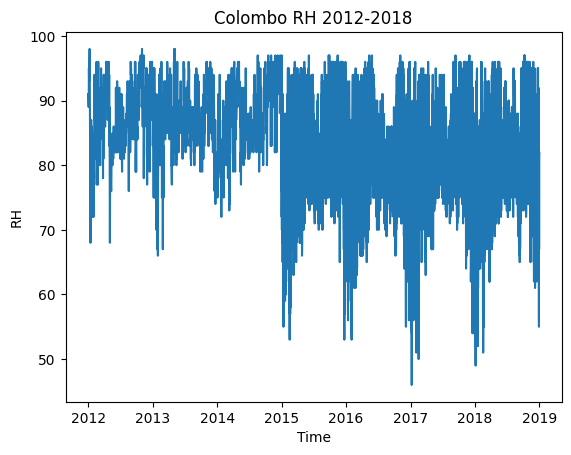

In [ ]:
plt.plot(df['obs_val'])
plt.xlabel('Time')
plt.ylabel('RH')
plt.title('Colombo RH 2012-2018')
plt.show()


# **By using Augmented Dick-fuller (ADF), Checking for stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['obs_val'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -6.216594584813608
p-value: 5.347220916585252e-08
Critical Values: {'1%': -3.4318527927183196, '5%': -2.86220405019551, '10%': -2.5671234784459993}


# **Make the data stationary**

In [ ]:
data_diff = df['obs_val'].diff().dropna()

# **Determine the order of differencing, p, and q**

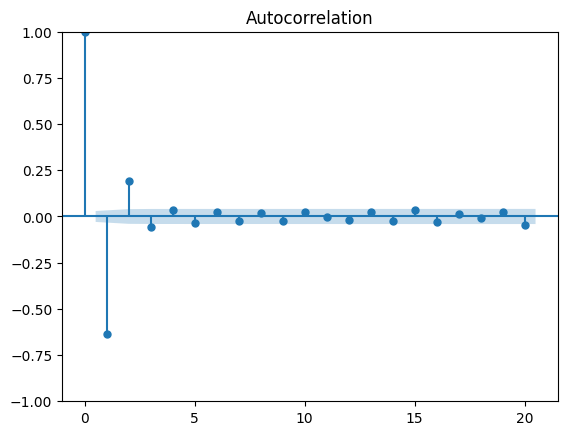

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


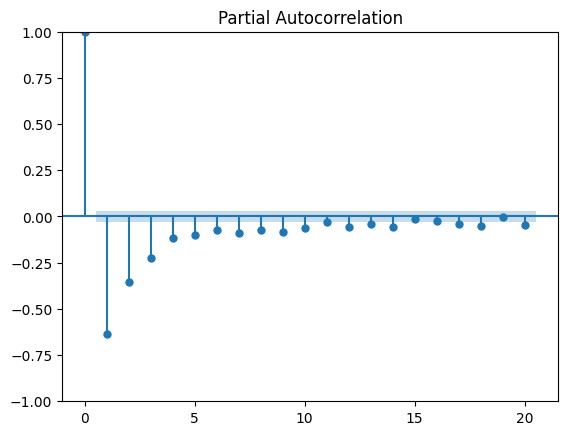

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_diff, lags=20)
plt.show()

plot_pacf(data_diff, lags=20)
plt.show()

# **Based on the plots, we can set p=1, d=1, and q=1**

In [ ]:
model = ARIMA(df['obs_val'], order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# **Validate the model**

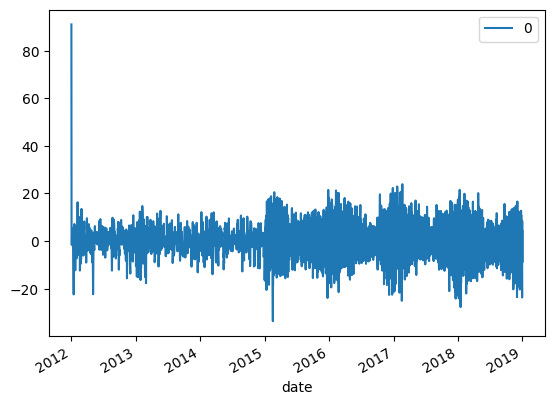

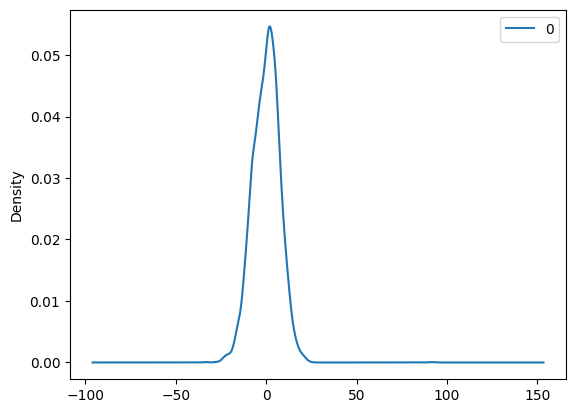

                 0
count  4383.000000
mean      0.002996
std       7.501788
min     -33.628595
25%      -5.071526
50%       0.525706
75%       5.123137
max      91.000000


In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()

print(residuals.describe())

# **Make predictions**

### **b. Predicted past 12 months RH**

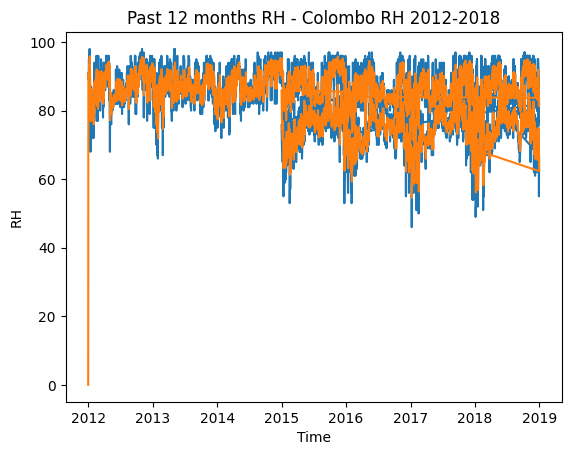

In [ ]:
past_rh = model_fit.predict(start=0, end=-13, dynamic=False)
plt.plot(df['obs_val'])
plt.plot(past_rh)
plt.xlabel('Time')
plt.ylabel('RH')
plt.title('Past 12 months RH - Colombo RH 2012-2018')
plt.show()